# Case Study: Predicting Heart Failure

## Objective

The goal of this case study is to predict the likelihood of heart failure in patients based on various clinical and demographic features. This is a binary classification problem where the target variable indicates whether the patient experienced heart failure or not. Accurate prediction can assist healthcare professionals in early detection and timely intervention for high-risk patients.

## Dataset Overview

The dataset contains patient information including demographics, clinical measurements, and test results. The target variable is **HeartDisease**, indicating whether the patient has heart disease.

**The dataset contains the following features:**  

- **Age**: age of the patient [years]  
- **Sex**: sex of the patient [M: Male, F: Female]  
- **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  
- **RestingBP**: resting blood pressure [mm Hg]  
- **Cholesterol**: serum cholesterol [mg/dl]  
- **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]  
- **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]  
- **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]  
- **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]  
- **Oldpeak**: ST depression induced by exercise relative to rest [Numeric value]  
- **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]  
- **HeartDisease**: output class [1: heart disease, 0: Normal]  

## Load the Dataset

In [1]:
import numpy as np
import pandas as pd

#Load the dataset
df = pd.read_csv('data/heart.csv')
df.shape

(918, 12)

In [2]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## EDA

In [4]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [5]:
import plotly.express as px
px.imshow(df.corr(numeric_only=True),title='Correlation Heatmap',text_auto=True)

- `Oldpeak` (ST depression induced by exercise) and `MaxHR` (maximum heart rate achieved) have the strongest correlations with heart disease, with `Oldpeak` positively correlated (0.404) and `MaxHR` negatively correlated (-0.400) with the target.

- `FastingBS` (fasting blood sugar) and `Age` also show moderate positive correlations with heart disease, suggesting that higher blood sugar levels and older age are associated with increased risk.

- Features like `RestingBP` and `Cholesterol` show weak correlations with the target, indicating limited linear association. 

- Inter-feature correlations are generally low, suggesting minimal multicollinearity among numeric predictors.

These insights highlight `Oldpeak`, `MaxHR`, `FastingBS`, and `Age` as potentially important predictors for modeling heart disease, and guide further exploration of categorical variables and feature interactions.


In [6]:
# Distribution of heart disease with respect to male and female
fig = px.histogram(df, x='HeartDisease', color='Sex', hover_data=df.columns, barmode='group', title='Heart Disease Distribution')
fig.show()

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- **RestingBP:** mean ~132 mm Hg, std ~18.5 - fairly typical BP, but note that min = 0, which is unrealistic (likely missing/incorrect data).

- **Cholesterol:** mean ~199 mg/dl, max 603 - extremely high max, min = 0 indicates potential outliers or missing values coded as 0.

In [8]:
# Distribution of ChestPainType with respect to gender
fig = px.histogram(df, x='ChestPainType', color='Sex', hover_data=df.columns, title='Heart Disease Distribution')
fig.show()

In [9]:
df.Sex.value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

<Figure size 1500x1000 with 0 Axes>

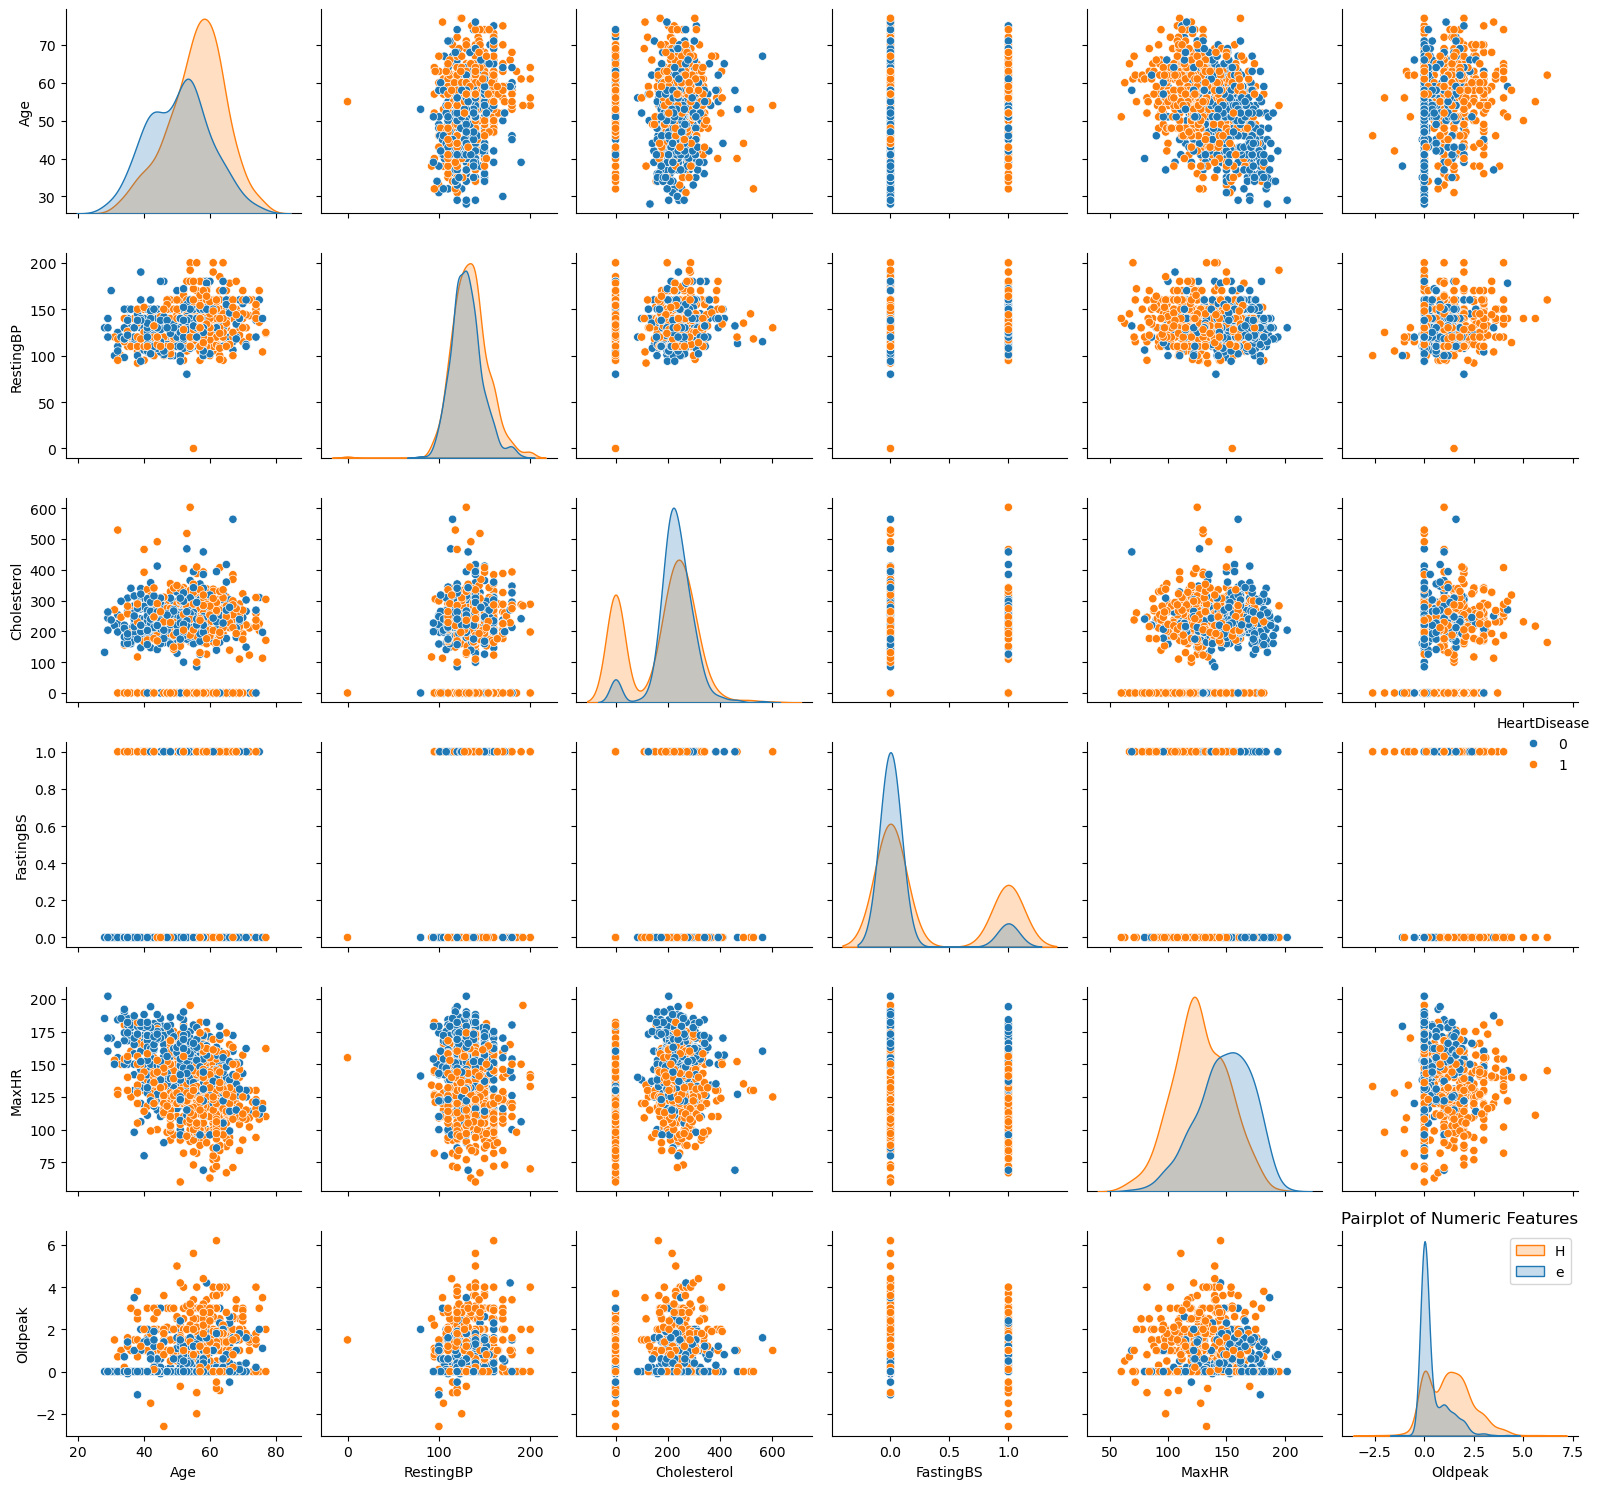

In [10]:
# Pairplot

from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.pairplot(df, hue='HeartDisease')
plt.title('Pairplot of Numeric Features')
plt.legend('HeartDisease')
plt.tight_layout()
plt.show()

- H is for the people who will suffer from heart disease and e for those who will not suffer from heart disease

Here the data seems to be evenly distributed

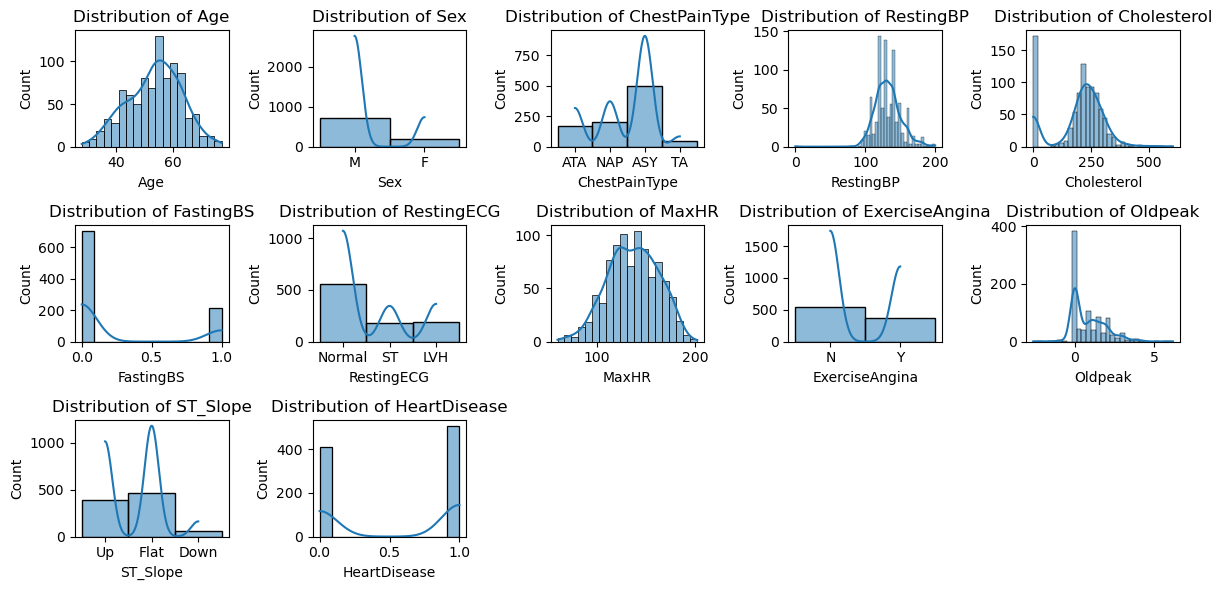

In [11]:
# Distribution to check for outliers

plt.figure(figsize=(12,6))
for i, col in enumerate(df.columns,1):
    plt.subplot(3,5,i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.plot()

Some outliers are present in cholestrol

In [12]:
# Check for outliers using boxplot
fig = px.box(df, y='Age', x='HeartDisease', title='Distribution of Age')
fig.show()

some outliers are present in Age but not that high.

In [13]:
# Check for outliers in RestingBP
fig = px.box(df, y='RestingBP', x='HeartDisease', title='RestingBP')
fig.show()

some outliers are present in RestingBP but not that high.

In [14]:
# Check for outliers in Oldpeak
fig = px.box(df, y='Oldpeak', x='HeartDisease', title='Oldpeak')
fig.show()

some outliers are present in Oldpeak for people not having heart disease but it seems to be true because even patients without heart disease can sometimes show higher ST depression during an exercise test due to temporary stress, anxiety, or other non-cardiac factors.

In [15]:
# Check for outliers in MaxHR
fig = px.box(df, y='MaxHR', x='HeartDisease', title='MaxHR')
fig.show()

Some outliers are present in MaxHR too 

In [16]:
# Check for missing values
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


There are no null values in this dataset, and if there were, we should avoid dropping rows due to the small dataset size and instead use imputation.

## Preprocessing

### Step1: Encode categorical features

In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

string_col = df.select_dtypes(include='O').columns

df_encoded = pd.get_dummies(df, columns=string_col, drop_first=False) # here drop_first=False is used to keep all categories for categorical variables whereas drop_first=True would drop the first category of each categorical variable
df_encoded.shape


(918, 21)

In [18]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [19]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


### Step2: Split the data

In [23]:
df_encoded.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

# Getting the features and target variable
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## Model Training and evaluation

In [36]:
# Import all models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Import pipeline
from sklearn.pipeline import Pipeline

# Import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score



In [45]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=42, max_iter=1000)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('DecisionTree Classifier', DecisionTreeClassifier(random_state=42)),
    ('RandomForest Classifier', RandomForestClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42, algorithm="SAMME")),
    ('GradientBoosting Classifier', GradientBoostingClassifier(random_state=42)),
    ('XGB Classifier', XGBClassifier(random_state=42)), # here n_estimators=100 by default
    ('SupportVector Classifier', SVC(random_state=42)),
    ('Naive Bayes Classifier', GaussianNB()),
]

best_model = None
best_accuracy = 0.0

In [53]:
import warnings
warnings.filterwarnings("ignore")

results = []

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])
    
    # Perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipeline on the training data
    pipeline.fit(X_train,y_train)

    # Make prediction on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # # Print the performance metrics
    # print("Model",name)
    # print("Cross Validation Accuracy: ",mean_accuracy)
    # print("Test Accuracy: ", accuracy)
    # print(f"F1 Score: {f1:.4f}")
    # print()

    results.append({
        "Model": name,
        "CV Accuracy": mean_accuracy,
        "Test Accuracy": accuracy,
        "F1 Score": round(f1, 4)
    })

    # Check if current model has better accuracy than the previous ones
    if f1 > best_accuracy:
        best_accuracy = f1
        best_model = pipeline

results_df = pd.DataFrame(results)
print(results_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True))
print("Best model: (by F1 score):", best_model)


                         Model  CV Accuracy  Test Accuracy  F1 Score
0      RandomForest Classifier     0.851458       0.891304    0.9029
1  GradientBoosting Classifier     0.855549       0.891304    0.9020
2          Logistic Regression     0.848700       0.885870    0.9005
3       Naive Bayes Classifier     0.854170       0.885870    0.8976
4          AdaBoost Classifier     0.847367       0.885870    0.8966
5               XGB Classifier     0.840565       0.875000    0.8867
6      DecisionTree Classifier     0.807856       0.793478    0.8137
7     SupportVector Classifier     0.719327       0.717391    0.7426
8        KNeighbors Classifier     0.707045       0.695652    0.7255
Best model: (by F1 score): Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])


## Conclusion

Across multiple models, Random Forest achieved the best F1-score, closely followed by Gradient Boosting and Logistic Regression. This suggests that both tree-based ensemble methods and linear models capture the patterns in the data well, but Random Forest is more robust in handling feature interactions and noise.

Key predictors identified during analysis were Oldpeak (ST depression), MaxHR, Age, and FastingBS, which align with known medical risk factors for heart disease. While features like RestingBP and Cholesterol showed weaker correlations, they may still contribute value when combined with other predictors.